In [1]:
import random
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import os

In [2]:
PATH = "./archive (6)/Cutout Files"
PATH_Star = "./archive (6)/Cutout Files/star"
PATH_Galaxy = "./archive (6)/Cutout Files/galaxy"

dataset_training = keras.utils.image_dataset_from_directory(PATH, shuffle=True, seed=32, validation_split=0.3,
                                                            image_size=(28, 28), subset="training",
                                                            color_mode="grayscale")
dataset_validation = keras.utils.image_dataset_from_directory(PATH, shuffle=True, seed=32, validation_split=0.3,
                                                              image_size=(28, 28),
                                                              subset="validation", color_mode="grayscale")


Found 3986 files belonging to 2 classes.
Using 2791 files for training.
Found 3986 files belonging to 2 classes.
Using 1195 files for validation.


In [3]:
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

dataset_training = dataset_training.map(normalize)
dataset_validation = dataset_validation.map(normalize)


In [4]:
i, j, k = os.walk(PATH)

placeStar, Starimages = k[0], k[2]
placeGalaxy, Galaxyimages = j[0], j[2]
print("Star Place:", placeStar)
print("Star Images:", Starimages[:10])
print("Galaxy Place:", placeGalaxy)
print("Galaxy Images:", Galaxyimages[:10])

Star Place: ./archive (6)/Cutout Files\star
Star Images: ['grb0422a_01_1046_1349_6.jpg', 'grb0422a_01_104_1014_6.jpg', 'grb0422a_01_1097_635_6.jpg', 'grb0422a_01_1134_1214_6.jpg', 'grb0422a_01_1143_346_6.jpg', 'grb0422a_01_1164_1310_6.jpg', 'grb0422a_01_117_1527_6.jpg', 'grb0422a_01_1181_692_6.jpg', 'grb0422a_01_119_679_6.jpg', 'grb0422a_01_120_1260_6.jpg']
Galaxy Place: ./archive (6)/Cutout Files\galaxy
Galaxy Images: ['grb0422a_01_1013_1727_3.jpg', 'grb0422a_01_1035_1991_3.jpg', 'grb0422a_01_257_154_3.jpg', 'IC3521-H01_1260_751_3.jpg', 'IC3521-H01_1300_759_3.jpg', 'IC3521-H01_1326_1169_3.jpg', 'IC3521-H01_1361_946_3.jpg', 'IC3521-H01_1399_1031_3.jpg', 'IC3521-H01_1449_1243_3.jpg', 'IC3521-H01_1536_1206_3.jpg']


In [5]:
import cv2
import random

star_image = random.choices(Starimages)
galaxy_images = random.choices(Galaxyimages)

print("Star:", str(PATH_Star + star_image[0]))
print("Galaxy:", str(PATH_Galaxy + galaxy_images[0]))

Star: ./archive (6)/Cutout Files/starJ1603p3002_001_010_883_65_6.jpg
Galaxy: ./archive (6)/Cutout Files/galaxyJ142943p385931_001_001_167_829_3.jpg


In [6]:
from PIL import Image

star_Image = os.path.join(PATH_Star, star_image[0])
galaxy_Image = os.path.join(PATH_Galaxy, galaxy_images[0])

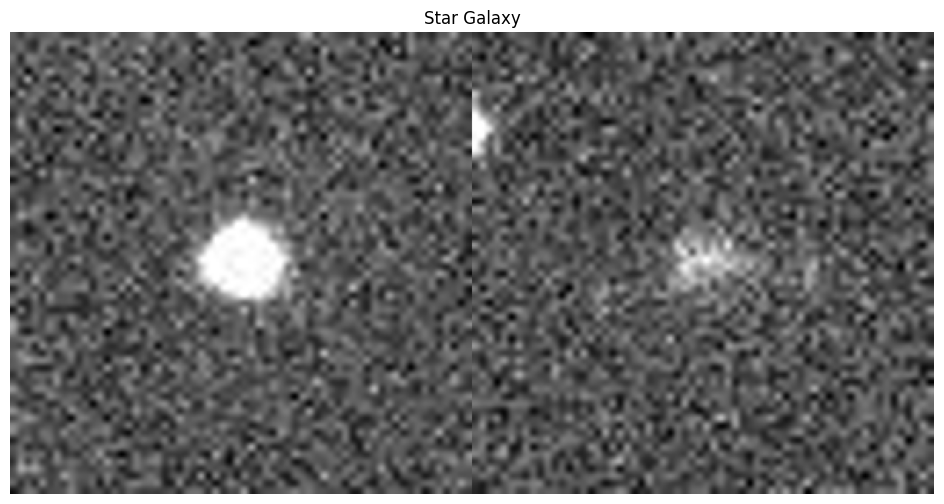

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load images
imageStar = Image.open(star_Image).convert('RGB')
imageGalaxy = Image.open(galaxy_Image).convert('RGB')

# Resize both images to same height
height = 300  # desired height
w_star = int((height / imageStar.height) * imageStar.width)
w_galaxy = int((height / imageGalaxy.height) * imageGalaxy.width)

imageStar = imageStar.resize((w_star, height))
imageGalaxy = imageGalaxy.resize((w_galaxy, height))

# Convert to numpy arrays
arrStar = np.array(imageStar)
arrGalaxy = np.array(imageGalaxy)

# Stack horizontally
result = np.hstack((arrStar, arrGalaxy))

# Plot with no axis and bigger figure
plt.figure(figsize=(12, 6), dpi=100)
plt.imshow(result)
plt.axis('off')
plt.title("Star Galaxy")
plt.show()


In [8]:
X = dataset_training
y = [0, 1]  # 0:Star, 1:Galaxy

In [9]:
from keras import Input, layers, Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, BatchNormalization, Dropout, Flatten

model = Sequential([
	Input(shape=(28, 28, 1)),

	Conv2D(256, (3, 3), activation='relu', padding='same'),
	MaxPooling2D((2, 2)),
	Dropout(0.2),

	Conv2D(128, (3, 3), activation='relu', padding='same'),
	MaxPooling2D((2, 2)),
	Dropout(0.2),

	Conv2D(64, (3, 3), activation='relu', padding='same'),
	MaxPooling2D((2, 2)),
	Dropout(0.2),

	Conv2D(32, (3, 3), activation='relu', padding='same'),
	MaxPooling2D((2, 2)),

	Flatten(),
	Dense(64, activation='relu'),  # Optional hidden dense layer
	Dropout(0.3),
	Dense(2, activation='softmax')  # 2 classes: Star, Galaxy
])

optimizer = keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 256)    │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 392,098 (1.50 MB)

 Trainable params: 392,098 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(dataset_training, validation_data=dataset_validation, epochs=10)

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 16s 156ms/step - accuracy: 0.7499 - loss: 0.5729 - val_accuracy: 0.7565 - val_loss: 0.5681
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - accuracy: 0.7788 - loss: 0.5331 - val_accuracy: 0.7565 - val_loss: 0.4711
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 14s 156ms/step - accuracy: 0.7795 - loss: 0.4550 - val_accuracy: 0.7883 - val_loss: 0.4592
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 13s 145ms/step - accuracy: 0.7843 - loss: 0.4335 - val_accuracy: 0.8117 - val_loss: 0.3886
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 14s 161ms/step - accuracy: 0.8345 - loss: 0.3619 - val_accuracy: 0.8184 - val_loss: 0.4034
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 13s 146ms/step - accuracy: 0.8458 - loss: 0.3495 - val_accuracy: 0.8218 - val_loss: 0.3707
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 13s 146ms/step - accuracy: 0.8469 - loss: 0.3344 - val_accuracy: 0.8276 - val_loss: 0.3684
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 13s 144ms/step - accuracy: 0.8496 - loss: 0.3398 - val_accu

In [11]:
metrices = history.history
print(metrices)

{'accuracy': [0.7610175609588623, 0.7667502760887146, 0.7835901379585266, 0.8068792819976807, 0.8362594246864319, 0.8538158535957336, 0.8498746156692505, 0.8534575700759888, 0.8656395673751831, 0.868147611618042], 'loss': [0.5623987317085266, 0.5179569721221924, 0.44133636355400085, 0.3981313407421112, 0.358522891998291, 0.33684518933296204, 0.33710306882858276, 0.33211520314216614, 0.3107718229293823, 0.298998087644577], 'val_accuracy': [0.7564853429794312, 0.7564853429794312, 0.7882845401763916, 0.8117154836654663, 0.8184100389480591, 0.8217573165893555, 0.8276150822639465, 0.8251045942306519, 0.8368200659751892, 0.8267782330513], 'val_loss': [0.5681204199790955, 0.4710792899131775, 0.45922765135765076, 0.3886468708515167, 0.4033663868904114, 0.37066569924354553, 0.36839759349823, 0.36618462204933167, 0.3554483950138092, 0.35935497283935547]}


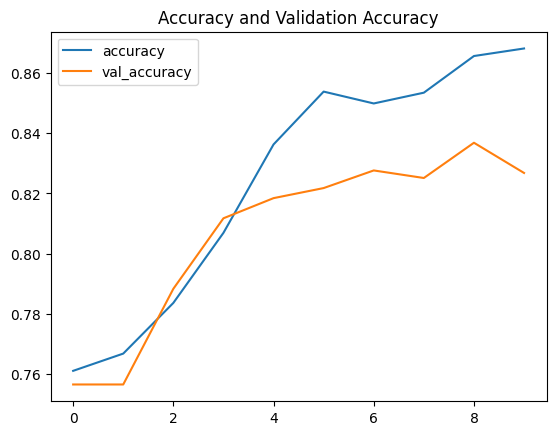

In [12]:
accuracy = metrices["accuracy"]
val_accuracy = metrices["val_accuracy"]

loss = metrices["loss"]
val_loss = metrices["val_loss"]

plt.plot(accuracy, label="accuracy")
plt.plot(val_accuracy, label = "val_accuracy")
plt.title("Accuracy and Validation Accuracy")
plt.legend()
plt.show()

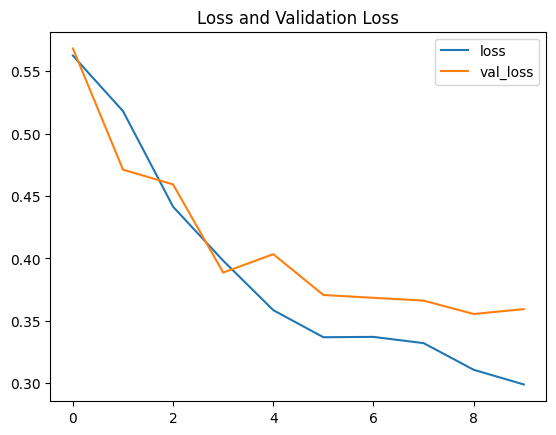

In [13]:
plt.plot(loss, label="loss")
plt.plot(val_loss, label = "val_loss")
plt.title("Loss and Validation Loss")
plt.legend()
plt.show()

In [14]:
evaluate = model.evaluate(dataset_validation)

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8108 - loss: 0.3704


In [15]:
print("Accuracy:",f"{evaluate[1]*100:.2f}%","\nLoss:", f"{evaluate[0] * 100:.2f}%")

Accuracy: 82.68% 
Loss: 35.94%


# Trying to do prediction with the Image

In [1]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("./Star.jpg", flags=1)  # flags=1 reads in color (default)
cv2.imshow("Star", image)
cv2.waitKey(0)
cv2.destroyWindow("Star")

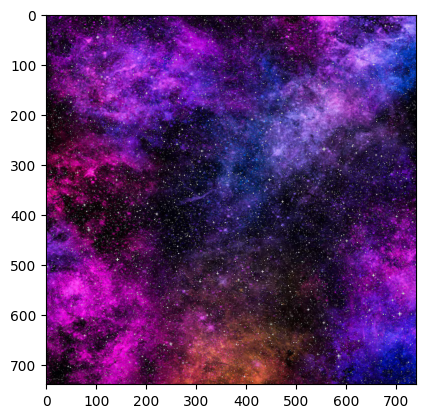

In [16]:
imagestar = Image.open("./Star.jpg")
plt.imshow(imagestar)

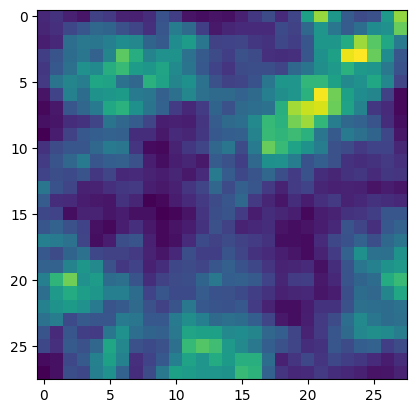

In [17]:
imagestar = imagestar.resize((28, 28))
imagestar = imagestar.convert("L")
plt.imshow(imagestar)

In [18]:
imagearray = np.array(imagestar)
imagearray = imagearray/255.0
imagearray = imagearray.reshape(1, 28, 28, 1)

In [19]:
predictions = model.predict(imagearray)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [20]:
y = ["Star", "Galaxy"]
print(y[np.argmax(predictions)])

Star
